In [1]:
import pandas as pd

fdust_df = pd.read_csv("미세먼지용_데이터셋.csv", encoding="UTF-8")

fdust_df.head()

,datetime,region,pm10,pm25,temperature,wind_direction,wind_speed,precipitation,humidity,aod_avg,aod_max,fuel_type,reg_count
0,2019-12-31 00:00:00,강남구,22.0,14.0,-4.1,286.3,3.5,0.0,50.0,293.569,4000.0,전기,14952.0
1,2019-12-31 00:00:00,강남구,22.0,14.0,-4.1,286.3,3.5,0.0,50.0,293.569,4000.0,휘발유,1607915.0
2,2019-12-31 00:00:00,강남구,22.0,14.0,-4.1,286.3,3.5,0.0,50.0,293.569,4000.0,경유,1121920.0
3,2019-12-31 00:00:00,강동구,30.0,17.0,-4.0,264.9,2.1,0.0,54.0,293.569,4000.0,전기,14952.0
4,2019-12-31 00:00:00,강동구,30.0,17.0,-4.0,264.9,2.1,0.0,54.0,293.569,4000.0,휘발유,1607915.0


In [2]:
df1 = fdust_df[['datetime', 'region', 'pm10', 'pm25']]

df1.head()

,datetime,region,pm10,pm25
0,2019-12-31 00:00:00,강남구,22.0,14.0
1,2019-12-31 00:00:00,강남구,22.0,14.0
2,2019-12-31 00:00:00,강남구,22.0,14.0
3,2019-12-31 00:00:00,강동구,30.0,17.0
4,2019-12-31 00:00:00,강동구,30.0,17.0


In [3]:
df1['region'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '중구', '중랑구', '종로구'], dtype=object)

In [4]:
gangnam_df = df1[df1['region'] == '강남구']

In [5]:
gangnam_df.head()

,datetime,region,pm10,pm25
0,2019-12-31 00:00:00,강남구,22.0,14.0
1,2019-12-31 00:00:00,강남구,22.0,14.0
2,2019-12-31 00:00:00,강남구,22.0,14.0
72,2019-12-30 23:00:00,강남구,24.0,14.0
73,2019-12-30 23:00:00,강남구,24.0,14.0


In [6]:
# datetime 컬럼이 datetime 타입이 아닐 경우 변환
gangnam_df['datetime'] = pd.to_datetime(gangnam_df['datetime'])



/var/folders/5k/zrsrnd7s18b7z_zm0b5yktj40000gn/T/ipykernel_87727/1817666282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam_df['datetime'] = pd.to_datetime(gangnam_df['datetime'])


In [13]:
gangnam_df.head()

,pm10,pm25
datetime,,
2017-01-01 01:00:00,63.0,48.0
2017-01-01 02:00:00,61.0,44.0
2017-01-01 03:00:00,71.0,44.0
2017-01-01 04:00:00,79.0,44.0
2017-01-01 05:00:00,73.0,40.0


In [7]:
gangnam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182544 entries, 0 to 4258643
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  182544 non-null  datetime64[ns]
 1   region    182544 non-null  object        
 2   pm10      182544 non-null  float64       
 3   pm25      182544 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 7.0+ MB


In [8]:
# 숫자형 컬럼만 선택
numeric_cols = gangnam_df.select_dtypes(include='number').columns.tolist()

# datetime 기준으로 숫자형 컬럼 평균값 집계
df_grouped = gangnam_df.groupby('datetime')[numeric_cols].mean().reset_index()

# datetime 기준으로 오름차순 정렬
df_grouped.sort_values(by='datetime', inplace=True)

In [9]:
gangnam_df = df_grouped

gangnam_df.head()

,datetime,pm10,pm25
0,2017-01-01 01:00:00,63.0,48.0
1,2017-01-01 02:00:00,61.0,44.0
2,2017-01-01 03:00:00,71.0,44.0
3,2017-01-01 04:00:00,79.0,44.0
4,2017-01-01 05:00:00,73.0,40.0


In [10]:
gangnam_df.set_index('datetime', inplace=True)

In [11]:
import statsmodels.api as sm

result = sm.tsa.seasonal_decompose(gangnam_df['pm10'], model='additive', period=8760)

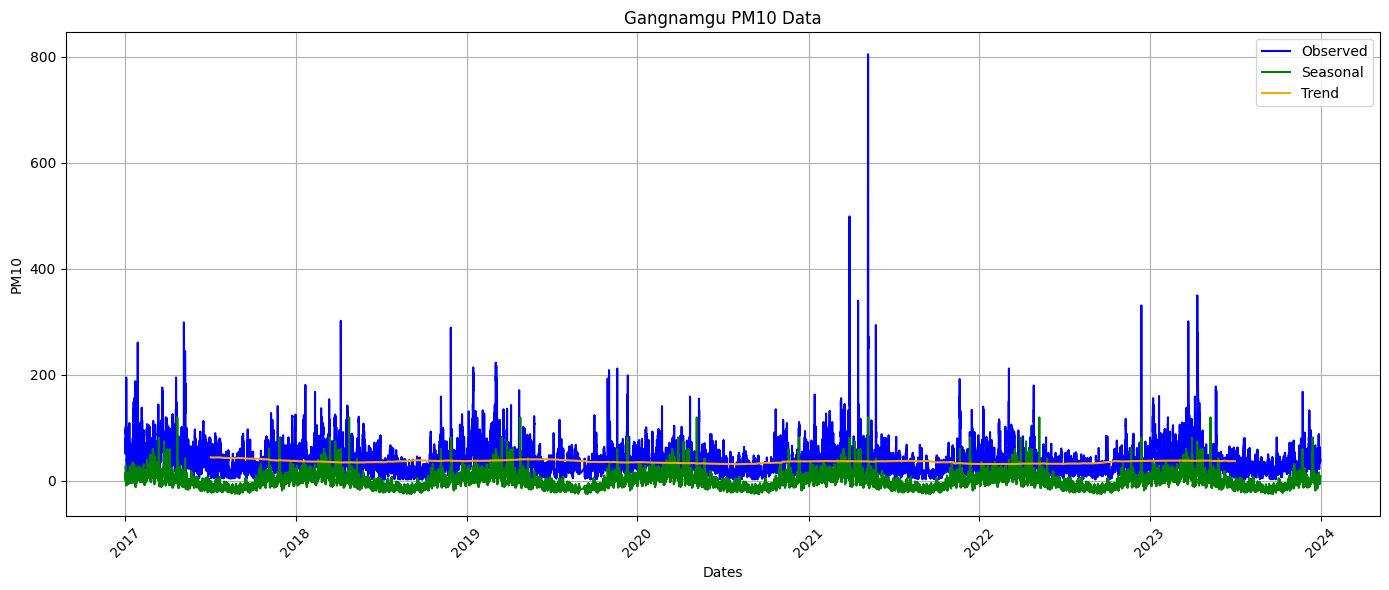

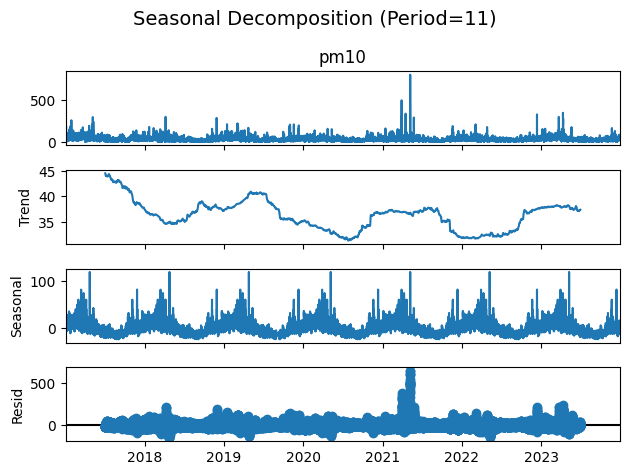

In [12]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator

# 그림과 축 생성
fig, ax = plt.subplots(figsize=(14, 6))

# 선형 그래프
# ax.plot(df.index, df['SUNACTIVITY'], color='black', label='original')
# ax.plot(df.index, df['MA_11'], color='red', label='11-year MA')
ax.plot(gangnam_df.index, result.observed, color='blue', label='Observed')
ax.plot(gangnam_df.index, result.seasonal, color='green', label='Seasonal')
ax.plot(gangnam_df.index, result.trend, color='orange', label='Trend')

# 눈금 설정: 20년 간격, 연도 형식
ax.xaxis.set_major_locator(YearLocator(1))  # 20년 단위 눈금
ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # YYYY 형식

# 레이블, 제목
ax.set_xlabel('Dates')
ax.set_ylabel('PM10')
ax.set_title('Gangnamgu PM10 Data')

# 눈금 회전
plt.xticks(rotation=45)

# 범례, 그리드, 레이아웃
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# seasonal decomposition 결과 시각화
result.plot()
plt.suptitle("Seasonal Decomposition (Period=11)", fontsize=14)
plt.tight_layout()
plt.show()